# ML Assignment 4

## Q1

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()

In [4]:
selector = VarianceThreshold(threshold=0)
x = selector.fit_transform(diabetes.data)

x_train, x_test, y_train, y_test = train_test_split(x, diabetes.target, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2900.173287883232


## Q2

<AxesSubplot:>

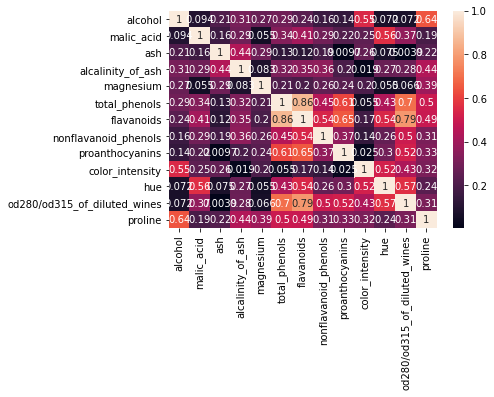

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
wine = load_wine()


df = pd.DataFrame(data=wine.data, columns=wine.feature_names)


corr_matrix = df.corr().abs()


sns.heatmap(corr_matrix, annot=True)


In [6]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [7]:
df.drop(columns=['total_phenols',],axis=1,inplace=True)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(df, wine.target, test_size=0.2, random_state=42)

svm = SVC()
params = {'C': [0.1, 1, 10, 100], 'kernel': [ 'poly', 'rbf', 'sigmoid']}
clf = GridSearchCV(svm, params, cv=5)
clf.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
acc

0.8333333333333334

## Q3

In [11]:
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

diabetes = load_diabetes()

x = diabetes.data
y = diabetes.target

selector = SelectKBest(mutual_info_regression, k=3)
selector.fit(x, y)
x_top = selector.transform(x)



In [12]:
x_top

array([[ 0.06169621,  0.01990842, -0.01764613],
       [-0.05147406, -0.06832974, -0.09220405],
       [ 0.04445121,  0.00286377, -0.02593034],
       ...,
       [-0.01590626, -0.04687948,  0.01549073],
       [ 0.03906215,  0.04452837, -0.02593034],
       [-0.0730303 , -0.00421986,  0.00306441]])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_top, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor()

params = {'max_depth': [1,2, 4, 6, 8, 10],
          'min_samples_leaf': [5,7,10,13,14,15],
          'max_features': [1, 2, 3]}

grid_search = GridSearchCV(tree, params, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

tree = DecisionTreeRegressor(**best_params)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

r2 = r2_score(y_test, y_pred)

print("Best hyperparameters:", best_params)
print("R-squared score:", r2)


Best hyperparameters: {'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 5}
R-squared score: 0.2703043740015454


## Q4

In [14]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV


boston = load_boston()

x = boston.data
y = boston.target

selector = SelectKBest(mutual_info_regression, k=5)
selector.fit(x, y)
x_top = selector.transform(x)



In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_top, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()

params = {'fit_intercept': [True, False],
          'normalize': [True, False]}

grid_search = GridSearchCV(linear_reg, params, cv=5, )
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

linear_reg = LinearRegression(**best_params)
linear_reg.fit(x_train, y_train)

y_pred = linear_reg.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("Best hyperparameters:", best_params)
print("R2 Score ",r2)


Best hyperparameters: {'fit_intercept': True, 'normalize': True}
R2 Score  0.6295550700486396
